In [1]:
%pylab inline
import pickle

pylab.rcParams['figure.figsize'] = (6.0, 9.0)

Populating the interactive namespace from numpy and matplotlib


In [196]:
# Parameters
n = 30  # number of particles
w, h = 10.7, 15.24  # width and height in meters
μu, σu = [1.2, 0, 0], [0.1, 0.1, 0.01] #motion model


In [197]:
from shapely.geometry import Polygon, Point

map1 = Polygon([[0, 0], [w, 0], [w, h], [0, h], [0, 0]])

def distance_to_map(px, py):
    return map1.boundary.distance(Point((px, py)))

distance_to_map(1, 1)

1.0

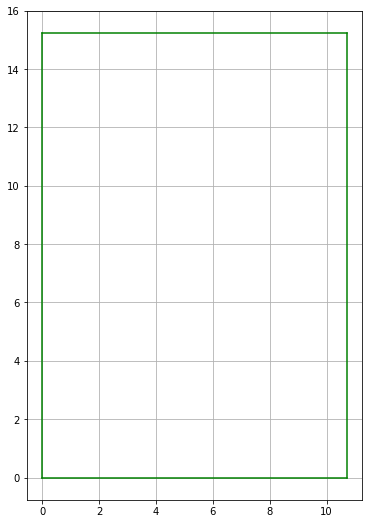

In [198]:
def draw_env():
    plot((0,w), (0,0), 'g')
    plot((0,0), (h,0), 'g')
    plot((w,w), (h,0), 'g')
    plot((0,w), (h,h), 'g')
    grid()
   
def draw_particles(P, color='k'):
    xx, yy, θθ = P.T
    plot(xx,yy, color + '.')
    quiver(xx,yy, cos(θθ), sin(θθ), color=color)
    
draw_env()

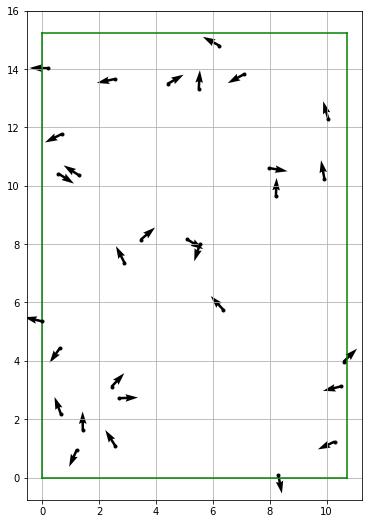

In [199]:
# Particles
xx = random.sample(n) * w 
yy = random.sample(n) * h 
θθ = random.sample(n) * 2 * pi

P = np.vstack((xx, yy, θθ)).T

draw_env()
draw_particles(P)

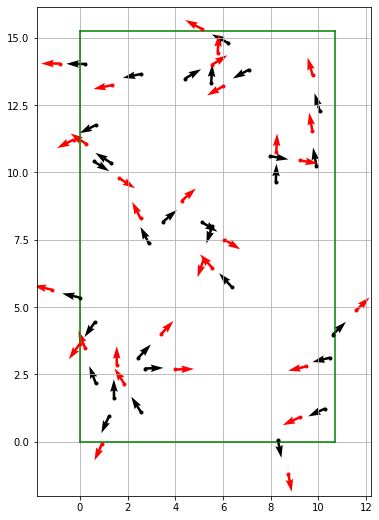

In [200]:
# Particle Motion
def move_particles(P):
    newP = []
    # For each particle
    for x,y,θ in P:
        # 1. motion model
        mx = μu[0] * cos(θ)
        my = μu[0] * sin(θ)
        mθ = 0
        # 2. Estimation 
        μx = x + mx
        μy = y + my
        μθ = θ + mθ
        # Sampling
        xt = random.normal(μx,σu[0])
        yt = random.normal(μy,σu[1])
        θt = random.normal(μθ,σu[2])
        newP.append([xt, yt, θt])
    newP = array(newP)
    return newP

draw_env()
draw_particles(P)
P1 = move_particles(P)
draw_particles(P1,'r')


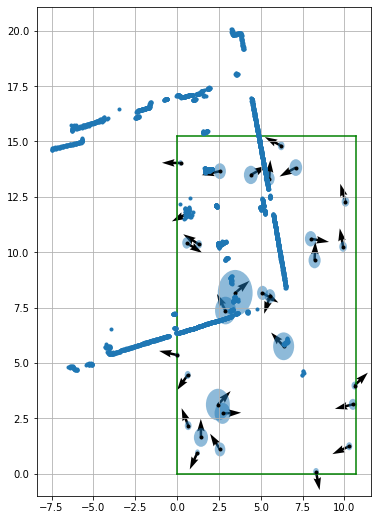

In [205]:
def particle_weights(P):
    weights = np.zeros(n)
    for i, p in enumerate(P):
        (x,y,θ) = p
        # samples for particle
        spx = x + cos(θ) * sx  - sin(θ) * sy
        spy = y + sin(θ) * sx  + cos(θ) * sy
    
        if i==0:
            plot(spx, spy, '.')
        ## Weight
        sum_distances = 0
        for px, py in zip(spx, spy):
            sum_distances += distance_to_map(px, py)**4

        weights[i] = 1. / sum_distances
#         weights[i] = sum_distances
        
    weights = array(weights) / sum(weights)
    return weights



fig, ax = plt.subplots()
draw_env()
draw_particles(P)
draw_weights(P, weights,10)
weights = particle_weights(P)

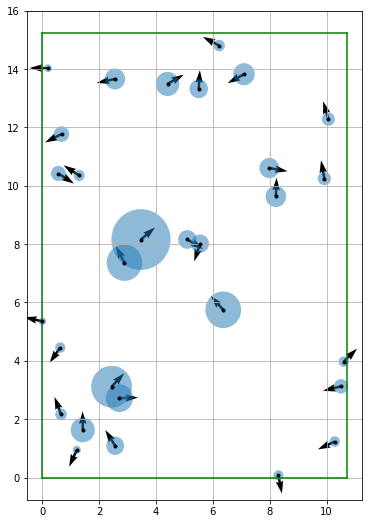

In [203]:
fig, ax = plt.subplots()
def draw_weights(P, weights, scale=10):
    for (x,y,θ), w in zip(P,weights):
        draw_circle = plt.Circle((x, y), scale*w, alpha=0.5)
        ax.add_artist(draw_circle)

        
draw_env()
draw_particles(P)
draw_weights(P, weights)

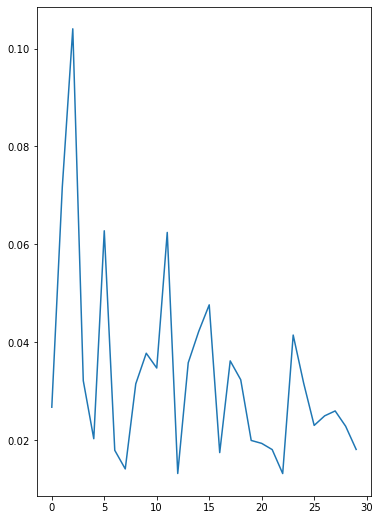

In [204]:
plot(weights)

3927

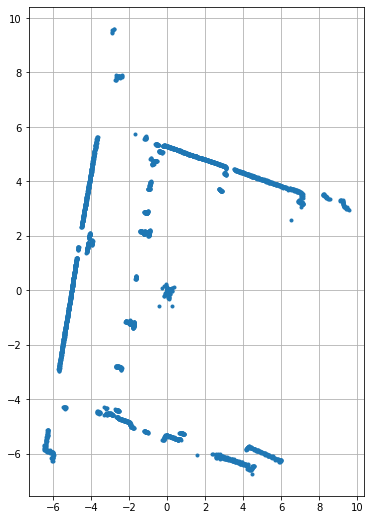

In [7]:
# Load data
positions = []

with open("samples.dat", "rb") as f:
    positions = pickle.load(f)
    
ϕ,d = np.array(positions[0]).T
ϕ = radians(ϕ)

sx = d*cos(ϕ)
sy = d*sin(ϕ)
plot(sx, sy, '.')
grid()
# for ϕ,d in positions[0]:
#     plot(d*cos())
len(d)

ValueError: x and y must have same first dimension, but have shapes (3927,) and (1,)

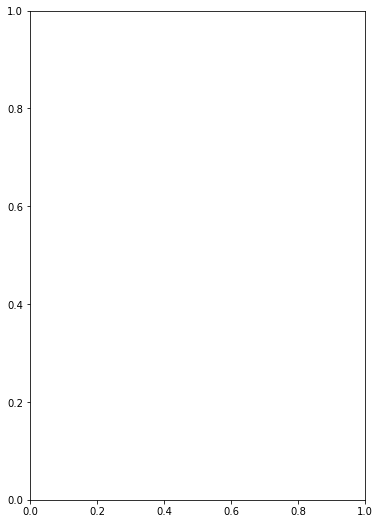

In [117]:
plot(ϕ,d)